In [1]:
import jax, load_data, rotplot
import math
import jax.numpy as jnp
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import numpy as np
import transforms3d

In [2]:
[camera,imu,Vicd] = load_data.load(fname="../../trainset",dataset="8")

Data import took: 1.414734125137329 sec.



In [3]:
print(Vicd.keys())
print(Vicd['rots'].shape)
rots = []
print(Vicd['rots'][:,:,0])
print(list(transforms3d.euler.mat2euler(Vicd['rots'][:,:,0])))
for i in range(Vicd['rots'].shape[2]):
    rots.append(list(transforms3d.euler.mat2euler(Vicd['rots'][:,:,i])))
rots = jnp.array(rots)
print(rots.shape)

dict_keys(['rots', 'ts'])
(3, 3, 3407)
[[ 0.99829121  0.05823462 -0.00483549]
 [-0.0581884   0.99826318  0.00920456]
 [ 0.00536312 -0.00890747  0.99994595]]
[-0.008907711542351725, -0.005363141625080843, -0.058222126724278324]
(3407, 3)


In [4]:
print(imu.keys())
Ax = imu['vals'][0].astype(np.float32)
Ay = imu['vals'][1].astype(np.float32)
Az = imu['vals'][2].astype(np.float32)
A = jnp.array([-Ax,-Ay,Az],dtype=jnp.float32)
print(A.shape)
print(A[0,0])

Wz = imu['vals'][3]
Wx = imu['vals'][4]
Wy = imu['vals'][5]
W = jnp.array([Wx,Wy,Wz])
print(W.shape)
print(W[:,0])


time = imu['ts'][0]
tau = np.zeros((len(time)-1,1))
for i,t in enumerate(time,start=0):
    if i == 0:
        continue
    else:
        tau[i-1] = t - time[i-1]
        
print(tau.shape)

dict_keys(['vals', 'ts'])
(3, 3501)
-511.0
(3, 3501)
[373 375 369]
(3500, 1)


In [5]:
import quarternions

fun = quarternions.predict_next_quarternion(tau,W)

In [7]:
funko = jnp.array(fun)

In [8]:
print(funko.shape)
print(len(funko[:,1]))

(3501, 4)
3501


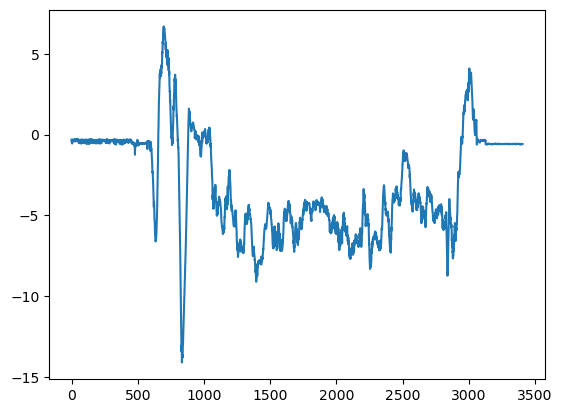

In [9]:
plt.plot(180/(math.pi)*rots[:,1])

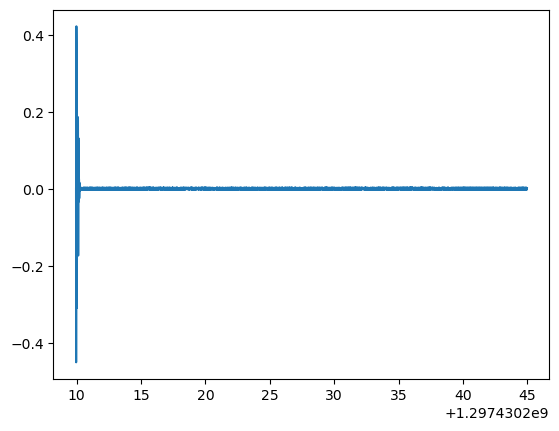

In [14]:
gimbo = map(quarternions.yaw_pitch_roll,fun)
A = list(gimbo)
plt.plot(time,funko[:,2])

In [23]:
noomoo = jnp.array(A)
print(noomoo.shape)

(3501, 3)


In [24]:
print(noomoo[:,0])

[ 0.          2.049414    0.69088477 ... -2.2046099  -3.1324158
 -1.1029574 ]


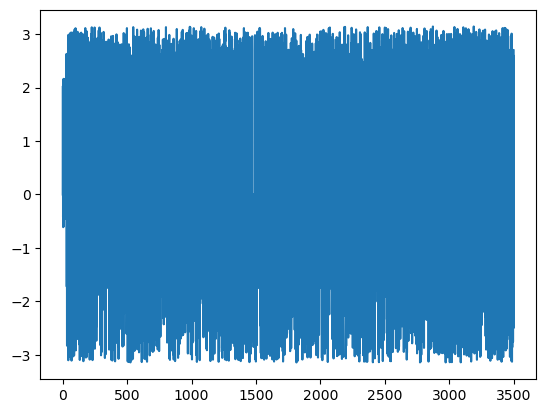

In [27]:
plt.plot(noomoo[:,2])

In [19]:
for i in tqdm(range(10),desc = "Outer Loop"):
    continue

Outer Loop: 100%|██████████| 10/10 [00:00<00:00, 105120.40it/s]


In [7]:
def myCost():
    raise NotImplementedError

[1 2 3]


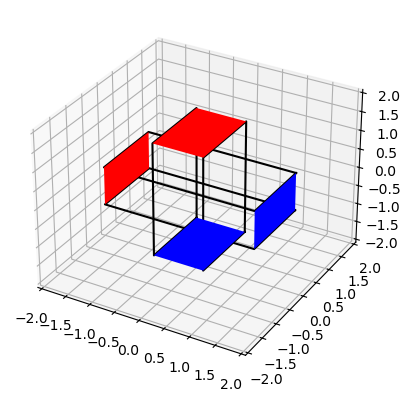

In [8]:
rotplot.example()